# 1 필터링
- **`시리즈 또는 데이터프레임의 데이터 중에서 특정 조건식을 만족하는 원소만 따로 추출`**하는 개념이다.

## 1.1 불린 인덱싱

데이터프레임의 불린 인덱싱: <b>`데이터프레임객체[불린시리즈]`</b>

- 시리즈 객체에 어떤 조건식을 적용하면 각 원소에 대해 참/거짓을 판별하여 불린(참,거짓) 값으로 구성된 시리즈를 반환한다.
- 이때 참에 해당하는 데이터 값을 따로 선택할 수 있는데, 많은 데이터 중에서 어떤 조건을 만족하는 데이터만을 추출하는 필터링 기법의 한 유형이다.
- 데이터프레임의 각 열은 시리즈 객체이므로, 조건식(>, <, ==, ..)을 적용하면 각 원소가 조건을 만족하는지 여부를 참과 거짓 값으로 표시하여 불린시리즈를 만들 수 있다.
- 이 **`불린시리즈를 데이터프레임에 대입하면 조건을 만족하는 행들만 선택`**할 수 있다.

* seaborn의 'titanic'데이터셋을 이용하여 불린인덱싱 해본다.

In [1]:
# 판다스, Seaborn 라이브러리 임포트

import pandas as pd
import seaborn as sns

In [2]:
# Seaborn 라이브러리의 'titanic'데이터셋을 로드(seaborn.load_dataset())한다.
# 로드한 데이터프레임을  df에 대입한다.

df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
# 데이터프레임 df의 앞부분 데이터 확인

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# 데이터프레임 df의 뒷부분 데이터 확인

df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
# 데이터프레임 df의 요약정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
# 데이터프레임 df를 복사하여 titanic데이터프레임을 만든다.

titanic = df.copy()

* 나이가 10대(10~19세)인 승객만 따로 선택

In [9]:
# titanic 데이터프레임의 각 행의 age가 10대인지 여부를 True, False값으로 가지는 불린시리즈 mask1 생성

mask1 = (titanic['age'] >= 10) & (titanic['age'] < 20)

In [10]:
# mask1 확인

mask1

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887     True
888    False
889    False
890    False
Name: age, Length: 891, dtype: bool

In [11]:
# mask1의 타입 확인

type(mask1)
# mask1은 불린시리즈이다.

pandas.core.series.Series

In [13]:
# titanic 데이터프레임의 행 인덱스 위치에 불린시리즈 mask1을 대입하면
# 해당조건을 만족하는(즉 True인행만) 행만 남게 된다.
# 결과른 df_teenage에 대입

df_teenage = titanic.loc[mask1]

In [14]:
# df_teenage 확인

df_teenage

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,1,1,female,16.0,0,1,39.4000,S,First,woman,False,D,Southampton,yes,False
855,1,3,female,18.0,0,1,9.3500,S,Third,woman,False,NaN,Southampton,yes,False
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [17]:
# 나이가 10대(10~19세)인 승객만 따로 선택

titanic.loc[(titanic['age'] >= 10) & (titanic['age'] < 20), ['survived', 'age']]

,survived,age
9,1,14.0
14,0,14.0
22,1,15.0
27,0,19.0
38,0,18.0
...,...,...
853,1,16.0
855,1,18.0
875,1,15.0
877,0,19.0


* 나이가 10세 미만(0~9세)이고 여성인 승객만 따로 선택

In [18]:
# titanic 데이터프레임의 각 행의 age가 10세 미만이고 성별이 여성인지 여부를 True, False값으로 가지는 불린시리즈 mask2 생성

mask2 = (titanic['age'] < 10) & (titanic['sex'] == 'female')

In [19]:
# mask2 확인, mssk2는 불린 시리즈임

mask2

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [21]:
# titanic 데이터프레임의 행 인덱스 위치에 불린시리즈 mask2를 대입하면
# 해당조건을 만족하는(즉 True인행만) 행만 남게 된다.
# 결과를 df_female_under10에 대입

df_female_under10 = titanic.loc[mask2]

In [22]:
# df_female_under10 확인

df_female_under10

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.00,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
24,0,3,female,8.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
43,1,2,female,3.00,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
58,1,2,female,5.00,1,2,27.7500,S,Second,child,False,NaN,Southampton,yes,False
119,0,3,female,2.00,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
147,0,3,female,9.00,2,2,34.3750,S,Third,child,False,NaN,Southampton,no,False
172,1,3,female,1.00,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False
184,1,3,female,4.00,0,2,22.0250,S,Third,child,False,NaN,Southampton,yes,False
205,0,3,female,2.00,0,1,10.4625,S,Third,child,False,G,Southampton,no,False
233,1,3,female,5.00,4,2,31.3875,S,Third,child,False,NaN,Southampton,yes,False


In [23]:
# 나이가 10세 미만(0~9세)이고 여성인 승객만 따로 선택

titanic.loc[(titanic['age'] < 10) & (titanic['sex'] == 'female')]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.00,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
24,0,3,female,8.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
43,1,2,female,3.00,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
58,1,2,female,5.00,1,2,27.7500,S,Second,child,False,NaN,Southampton,yes,False
119,0,3,female,2.00,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
147,0,3,female,9.00,2,2,34.3750,S,Third,child,False,NaN,Southampton,no,False
172,1,3,female,1.00,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False
184,1,3,female,4.00,0,2,22.0250,S,Third,child,False,NaN,Southampton,yes,False
205,0,3,female,2.00,0,1,10.4625,S,Third,child,False,G,Southampton,no,False
233,1,3,female,5.00,4,2,31.3875,S,Third,child,False,NaN,Southampton,yes,False


In [24]:
titanic.loc[(titanic['age'] < 10) & (titanic['sex'] == 'female'), ['pclass', 'sex', 'age']]

,pclass,sex,age
10,3,female,4.00
24,3,female,8.00
43,2,female,3.00
58,2,female,5.00
119,3,female,2.00
147,3,female,9.00
172,3,female,1.00
184,3,female,4.00
205,3,female,2.00
233,3,female,5.00


* 나이가 10세 미만(0~9세)이거나 또는 60세 이상인 승객의 age, sex, alone 열만 선택

In [25]:
# titanic 데이터프레임의 각 행의 age가 10세 미만이거나 age가 60세 이상인지 여부를 True, False값으로 가지는 불린시리즈 mask3 생성

mask3 = (titanic['age'] < 10) | (titanic['age'] >= 66)

In [26]:
# mask3 확인

mask3

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: age, Length: 891, dtype: bool

In [27]:
# titanic 데이터프레임의 행 인덱스 위치에 불린시리즈 mask3을 대입하면
# 해당조건을 만족하는(즉 True인행만) 행만 남게 된다.
# 열 인덱스에 '['age', 'sex', 'alone']' 대입해 원하는 열만을 선택했기 때문에 나이가 10세 미만이거나 60세 이상인 
# 탑승객의 나이, 성별, 혼자탑승여부를 선택할 수 있다.
# 결과를 df_under10_morethan60에 대입

df_under10_morethan60 = titanic.loc[mask3]

In [28]:
# df_under10_morethan60 확인

df_under10_morethan60

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
10,1,3,female,4.00,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
16,0,3,male,2.00,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
24,0,3,female,8.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
33,0,2,male,66.00,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,NaN,Southampton,yes,False
850,0,3,male,4.00,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
851,0,3,male,74.00,0,0,7.7750,S,Third,man,True,NaN,Southampton,no,True
852,0,3,female,9.00,1,1,15.2458,C,Third,child,False,NaN,Cherbourg,no,False


In [32]:
# 나이가 10세 미만(0~9세)이거나 또는 60세 이상인 승객의 age, sex, alone 열만 선택

df_under10_morethan60.loc[:, ['age', 'sex', 'alone']]
#titanic.loc[(titanic['age'] < 10) | (titanic['age'] >= 66), ['age', 'sex', 'alone']]

,age,sex,alone
7,2.00,male,False
10,4.00,female,False
16,2.00,male,False
24,8.00,female,False
33,66.00,male,True
...,...,...,...
831,0.83,male,False
850,4.00,male,False
851,74.00,male,True
852,9.00,female,False


* 혼자온 사람이 아닌 데이터만 필터링

In [33]:
# 혼자온 사람이 아닌 데이터만 필터링

titanic.loc[titanic['alone'] != True]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1,2,female,28.0,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False


In [35]:
# 혼자온 사람이 아닌 데이터만 필터링
# ~True == False

titanic.loc[~titanic['alone']]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1,2,female,28.0,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False


# 2 우리나라 의료기관 데이터 살펴보기
* './data/소상공인시장진흥공단_상가업소정보_의료기관.csv'파일을 읽어와서 살펴본다.

## 2.1 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 2.2 시각화를 위한 폰트 설정


In [50]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 위에 내용을 실행하고 런타임을 다시 시작해줘야 함

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (52.5 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155455 files and di

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 한글폰드 오류해결
plt.rc('font', family='NanumBarunGothic')

# x,y축에 -부호 오류 해결
plt.rc('axes', unicode_minus=False)

## 2.3 데이터 로드하기


In [3]:
# 데이터파일을 로드해서 df라는 변수에 대입

df = pd.read_csv('/content/drive/MyDrive/ChangProgram/data/소상공인시장진흥공단_상가업소정보_의료기관.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 2.4 데이터 미리보기


In [40]:
# 데이터 앞부분 살펴보기

df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4.0,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5.0,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1.0,NaN,127.095522,37.323528


In [41]:
# 데이터 마지막 부분 살펴보기

df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91330,16196725,온누리약국,베스트,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,3017011200115070000021096,NaN,대전광역시 서구 문예로 67,302831.0,35240.0,NaN,NaN,NaN,127.389865,36.352728
91331,16192180,리원,봄산후조,S,의료,S07,의료관련서비스업,S07A07,산후조리원,S96993,...,4128112300111460000011715,청한프라자,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,NaN,NaN,NaN,126.830144,37.627530
91332,16127538,참좋은요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2641010800105380001005572,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,NaN,2,NaN,129.082790,35.227138
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1174010500103450009002392,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.806640


In [43]:
# sample 데이터 살펴보기

df.sample(5)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
51617,25141938,잇츠미의원,천안점,S,의료,S01,병원,S01B02,일반병원,Q86102,...,4413111800104620006000001,터미널프라자,충청남도 천안시 동남구 만남로 50,330993.0,31123.0,NaN,NaN,1001,127.157608,36.818670
69678,27703251,류재춘내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,4128710400122220003000717,씨티타워,경기도 고양시 일산서구 중앙로 1559,411805.0,10381.0,NaN,NaN,402,126.748182,37.675406
49104,21016558,연세온누리약국,NaN,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4113510500102480005001733,코코프라자,경기도 성남시 분당구 서현로210번길 20,463824.0,13591.0,NaN,NaN,NaN,127.124021,37.385854
19093,25202941,닥터진마인드&브레인정신건강의,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,4113510300101590002049130,NaN,경기도 성남시 분당구 성남대로331번길 13,463867.0,13558.0,NaN,NaN,501,127.106299,37.365276
54328,24753972,길마취통증의학과의원,NaN,S,의료,S01,병원,S01B02,일반병원,Q86102,...,4511114100112390004000001,NaN,전라북도 전주시 완산구 홍산로 253,560800.0,54966.0,자,NaN,405,127.105502,35.816376


## 2.5 데이터 요약하기

### 2.5.1 요약정보

In [44]:
# df 요약정보 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

### 2.5.2 컬럼명 보기

In [45]:
# df의 컬럼확인

df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 2.5.3 데이터 타입

In [46]:
# df의 모든 컬럼의 데이터타입 확인

df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 2.6 결측치 구하기

In [49]:
# df의 결측치 수 구하기

df.isnull().sum().sort_values(ascending=False)

지점명          89989
동정보          83929
건물부번지        80731
호정보          75784
층정보          47291
건물명          44882
지번부번지        19256
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시군구코드          379
시군구명           379
행정동명           379
시도명            379
법정동코드           55
법정동명            55
구우편번호           12
신우편번호            2
건물관리번호           0
건물본번지            0
상가업소번호           0
도로명주소            0
도로명코드            0
경도               0
도로명              0
지번코드             0
지번주소             0
지번본번지            0
대지구분명            0
대지구분코드           0
상호명              0
행정동코드            0
상권업종소분류명         0
상권업종소분류코드        0
상권업종중분류명         0
상권업종중분류코드        0
상권업종대분류명         0
상권업종대분류코드        0
위도               0
dtype: int64

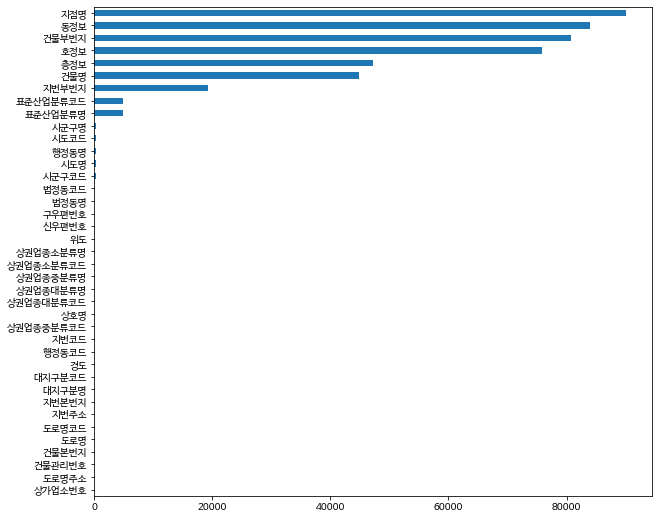

In [5]:
# 위에서 구한 결측치를 막대그래프로 시각화

df.isnull().sum().sort_values(ascending=True).plot(kind='barh', figsize=(10,9))

### 2.6.1 결측치가 많은 컬럼들의 정보를 데이터프레임으로 구성하기

In [8]:
# 위에서 구한 결과를 reset_index를 이용하여 데이터프레임으로 변경한다.
# 변경된 데이터프레임을 변수 df_null_count에 대입한다.

df_null_count = df.isnull().sum().sort_values(ascending=False).reset_index()
df_null_count.head(9)

,index,0
0,지점명,89989
1,동정보,83929
2,건물부번지,80731
3,호정보,75784
4,층정보,47291
5,건물명,44882
6,지번부번지,19256
7,표준산업분류코드,4922
8,표준산업분류명,4922


In [9]:
# df_null_count 컬럼의 이름을 "컬럼명", "결측치수"로 변경한다.

df_null_count.columns = ['컬럼명', '결측치수']

In [10]:
# df_null_count 데이터프레임의 결측치가 많은 순으로 상위 9개만 선택해서 df_null_head변수에 대입한다.

df_null_head = df_null_count.head(9)
df_null_head

,컬럼명,결측치수
0,지점명,89989
1,동정보,83929
2,건물부번지,80731
3,호정보,75784
4,층정보,47291
5,건물명,44882
6,지번부번지,19256
7,표준산업분류코드,4922
8,표준산업분류명,4922


### 2.6.2 결측치가 많은 컬럼들 제거하기

In [11]:
# df_null_head 데이터프레임의 '컬럼명' 컬럼 불러오기

df_null_head['컬럼명']

0         지점명
1         동정보
2       건물부번지
3         호정보
4         층정보
5         건물명
6       지번부번지
7    표준산업분류코드
8     표준산업분류명
Name: 컬럼명, dtype: object

In [12]:
# '컬럼명' 이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 담기

drop_columns = df_null_head['컬럼명'].values
drop_columns

array(['지점명', '동정보', '건물부번지', '호정보', '층정보', '건물명', '지번부번지', '표준산업분류코드',
       '표준산업분류명'], dtype=object)

In [13]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임 df에서 가져오기

df[drop_columns]

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원
1,NaN,NaN,NaN,NaN,4.0,NaN,14.0,Q86201,일반 의원
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원
3,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,NaN
4,수지점,NaN,NaN,NaN,1.0,NaN,2.0,G47811,의약품 및 의료용품 소매업
...,...,...,...,...,...,...,...,...,...
91330,베스트,NaN,NaN,NaN,NaN,NaN,NaN,G47811,의약품 및 의료용품 소매업
91331,봄산후조,NaN,NaN,NaN,NaN,청한프라자,NaN,S96993,개인 간병인 및 유사 서비스업
91332,NaN,NaN,NaN,NaN,2,한신시티빌,1.0,Q86102,일반 병원
91333,NaN,NaN,NaN,NaN,NaN,NaN,9.0,Q86203,한의원


In [14]:
# 결측치를 제거하기 전의 df의 행과 열의 개수 확인하기

df.shape

(91335, 39)

In [15]:
# df에서 결측치가 많은 상위 9개의 열을 제거하기

df = df.drop(columns=drop_columns, axis=1)

In [16]:
# 결측치를 제거한 후의 df의 행과 열의 개수 확인하기

df.shape

(91335, 30)

In [17]:
# 결측치를 제거한 df의 요약 정보 확인하기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도코드       90956 non-null  float64
 9   시도명        90956 non-null  object 
 10  시군구코드      90956 non-null  float64
 11  시군구명       90956 non-null  object 
 12  행정동코드      91335 non-null  int64  
 13  행정동명       90956 non-null  object 
 14  법정동코드      91280 non-null  float64
 15  법정동명       91280 non-null  object 
 16  지번코드       91335 non-null  int64  
 17  대지구분코드     91335 non-null  int64  
 18  대지구분명      91335 non-null  object 
 19  지번본번지      91335 non-null  int64  
 20  지번주소  

## 2.7 기초 통계값 보기

In [18]:
# 위도 통계값 요약해보기

df['위도'].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [19]:
# 위도와 경도 통계값 요약해보기

df[['위도', '경도']].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [20]:
# describe로 문자열 데이터타입의 요약해보기

df.describe(include='object')

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


## 2.8 컬럼의 고유데이터 확인

In [21]:
# '상권업종대분류명' 고유데이터 확인

df['상권업종대분류명'].unique()

array(['의료'], dtype=object)

In [22]:
# '상권업종대분류명' 고유데이터 개수 확인

df['상권업종대분류명'].nunique()

1

In [23]:
# '상권업종중분류명' 고유데이터 확인

df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [24]:
# '상권업종중분류명' 고유데이터 개수 확인

df['상권업종중분류명'].nunique()

5

In [25]:
# '상권업종소분류명' 고유데이터 확인

df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [26]:
# '상권업종소분류명' 고유데이터 개수 확인

df['상권업종소분류명'].nunique()

34

## 2.9 컬럼의 고유데이터 종류와 개수 확인

In [29]:
# '시도명'의 고유데이터 종류와 개수 확인

df['시도명'].value_counts()

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [28]:
# normalize=True 옵션을 사용하여 비율확인

df['시도명'].value_counts(normalize=True)

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

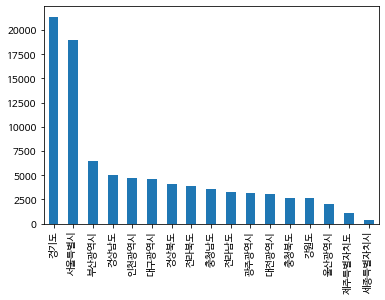

In [30]:
# 시도명'의 고유데이터 종류와 개수를 막대그래프로 시각화하기

df['시도명'].value_counts().plot(kind='bar')

In [31]:
# '상권업종대분류명'의 고유데이터 종류와 개수 확인

df['상권업종대분류명'].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [32]:
# '상권업종중분류명'의 고유데이터 종류와 개수 확인

df['상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [33]:
# '상권업종중분류명'의 고유데이터 종류와 개수확인
# normalize=True 를 사용해 비율확인

df['상권업종중분류명'].value_counts(normalize=True)

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

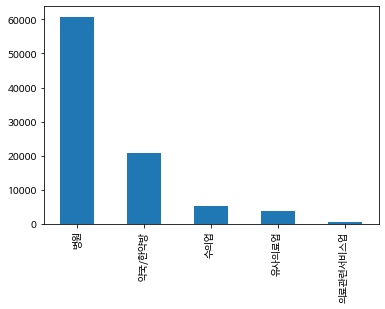

In [34]:
# '상권업종중분류명'의 고유데이터 종류와 개수를 막대그래프로 시각화하기

df['상권업종중분류명'].value_counts().plot(kind='bar')

In [35]:
# '상권업종소분류명'의 고유데이터 종류와 개수 확인

df['상권업종소분류명'].value_counts()

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: 상권업종소분류명, dtype: int64

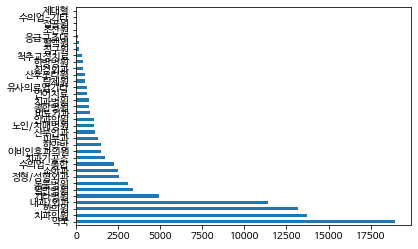

In [36]:
# '상권업종소분류명'의 고유데이터 종류와 개수를 막대그래프로 시각화하기

df['상권업종소분류명'].value_counts().plot(kind='barh')

## 2.10 데이터 필터링하기

### 2.10.1 하나의 조건으로 필터링하기

* 약국,한약방 관련 데이터 확인하기

In [40]:
# '상권업종중분류명'이 '약국/한약방'인 데이터 필터링하기 

df.loc[(df['상권업종중분류명'] == '약국/한약방')]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,41.0,경기도,...,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
6,20733252,춘산한약방,S,의료,S02,약국/한약방,S02A02,한약방,42.0,강원도,...,강원도 춘천시 중앙로2가 99,421104454113,강원도 춘천시 낙원길,50,4211010500101000000023668,강원도 춘천시 낙원길 50,200042.0,24273.0,127.726905,37.880504
7,20582210,부부탕제원,S,의료,S02,약국/한약방,S02A03,탕제원,43.0,충청북도,...,충청북도 청주시 상당구 금천동 187-17,431114508623,충청북도 청주시 상당구 중고개로337번길,134,4311112000101870017042942,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,127.499206,36.625355
10,21057519,민생약국,S,의료,S02,약국/한약방,S02A01,약국,48.0,경상남도,...,경상남도 합천군 용주면 월평리 78-2,488904844473,경상남도 합천군 용주면 월평길,149,4889046030200780002048274,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,128.118615,35.575962
13,21217689,제중당한약방,S,의료,S02,약국/한약방,S02A02,한약방,46.0,전라남도,...,전라남도 영암군 도포면 덕화리 296,468304685396,전라남도 영암군 도포면 인덕길,75,4683035023102960000000001,전라남도 영암군 도포면 인덕길 75-10,526832.0,58429.0,126.630348,34.834080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91312,16131397,큰나무약국,S,의료,S02,약국/한약방,S02A01,약국,41.0,경기도,...,경기도 고양시 덕양구 성사동 700-11,412812192001,경기도 고양시 덕양구 고양대로,1361,4128110600107000011013834,경기도 고양시 덕양구 고양대로 1361,412807.0,10464.0,126.835684,37.655048
91321,16130841,복음약국,S,의료,S02,약국/한약방,S02A01,약국,27.0,대구광역시,...,대구광역시 달서구 본동 276,272904241030,대구광역시 달서구 구마로36길,33,2729012400102760000029818,대구광역시 달서구 구마로36길 33,704752.0,42735.0,128.547352,35.836250
91322,16091491,설연화한복감성약방,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 중랑구 묵동 174-1,112603005050,서울특별시 중랑구 공릉로,28,1126010400101740001009985,서울특별시 중랑구 공릉로 28,131848.0,2034.0,127.078082,37.613194
91324,16109731,위례수약국,S,의료,S02,약국/한약방,S02A01,약국,41.0,경기도,...,경기도 성남시 수정구 창곡동 559-4,411313350738,경기도 성남시 수정구 위례서일로,18,4113110800101810002000002,경기도 성남시 수정구 위례서일로 18,461210.0,13647.0,127.137870,37.465260


* 의료에 해당하는 하위 종목의 데이터 종류와 개수를 확인한다

In [42]:
# '상권업종대분류명'이 '의료'인 데이터의 '상권업종중분류명만 필터링
# 필터링 결과를 value_counts 를 통해 중분류의 데이터 종류와 개수를 확인

df.loc[(df['상권업종대분류명'] == '의료'), '상권업종중분류명'].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

* 유사의료업 데이터의 개수를 확인한다.

In [44]:
# '유사의료업' 데이터만 필터링하여 
# 필터링한 결과 데이터프레임의 행열의 개수(shape)를 구하고
# 행열의 개수중 행의 수(shape[0])를 구한다.

df.loc[(df['상권업종중분류명'] == '유사의료업')].shape[0]

3774

* 가장 많이 쓰이는 상호명 상위 10개를 확인한다.

In [45]:
# df의 '상호명' 컬럼의 고유데이터 종류와 개수 확인하기
# 상위10개만 출력하기

df['상호명'].value_counts().head(10)

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

* 유사의료업에서 가장 많이 사용되는 상호명 10개를 확인한다.

In [48]:
# '상권업종중분류명'이 '유사의료업'인 데이터를 필터링하고, 필터링결과의 '상호명'을 value_counts() 한다.

df.loc[df['상권업종중분류명'] == '유사의료업', '상호명'].value_counts()

리원            32
고려수지침         22
대한적십자사        17
헌혈의집          12
고려수지침학회       10
              ..
태흥침술원          1
인체역학연구원        1
백년대계치과기공소      1
고려수지침새원주지회     1
씨앤디자인치과기공소     1
Name: 상호명, Length: 2926, dtype: int64

### 2.10.2 여러 조건으로 필터링하기

* 서울특별시에 있는 약국데이터 조회하기

In [49]:
# '상권업종소분류명'이 '약국'이고 '시도명'이 '서울특별시'인 데이터만 필터링한다.

df.loc[(df['상권업종소분류명'] == '약국') & (df['시도명'] == '서울특별시')]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656
51,20855710,진흥약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 강동구 둔촌동 630,117403124002,서울특별시 강동구 명일로,172,1174010600106090000000001,서울특별시 강동구 명일로 172,134767.0,5360.0,127.145055,37.534135
130,21589838,신세계약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 중랑구 신내동 646,112603106007,서울특별시 중랑구 신내로,211,1126010600106460000000300,서울특별시 중랑구 신내로 211,131130.0,2024.0,127.092597,37.616424
136,22388303,메디팜한솔약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 성동구 행당동 346,112003103006,서울특별시 성동구 행당로,82,1120010700103460012016935,서울특별시 성동구 행당로 82,133777.0,4717.0,127.027513,37.556238
141,22412563,명약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 동대문구 휘경동 286-121,112304115120,서울특별시 동대문구 망우로18나길,3,1123010900102860121007257,서울특별시 동대문구 망우로18나길 3,130090.0,2498.0,127.060556,37.587349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91239,16131547,우리이웃약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 성북구 종암동 34-3,112904121682,서울특별시 성북구 종암로5길,26,1129013500100340003022753,서울특별시 성북구 종암로5길 26,136769.0,2811.0,127.033908,37.594792
91275,16195709,더블유스토어,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 구로구 구로동 501,115303116005,서울특별시 구로구 구로중앙로,134,1153010200105010000000001,서울특별시 구로구 구로중앙로 134,152731.0,8293.0,126.884285,37.499936
91288,16131839,종각팜약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 종로구 종로2가 84-8,111103100013,서울특별시 종로구 종로,68,1111013800100160006014311,서울특별시 종로구 종로 68,110122.0,3189.0,126.984930,37.569882
91301,16188650,온누리약국,S,의료,S02,약국/한약방,S02A01,약국,11.0,서울특별시,...,서울특별시 구로구 구로동 798-30,115304148329,서울특별시 구로구 디지털로27길,116,1153010200107980032000001,서울특별시 구로구 디지털로27길 116,152875.0,8374.0,126.888070,37.484897


* 서울특별시의 각 구별 약국의 수 조회하기

In [50]:
# '상권업종소분류명'이 '약국'이고 '시도명'이 '서울특별시'인 데이터만 필터링한다.
# 필터링한 결과의 '시군구명' 컬럼을 선택해서 고유데이터 종류와 개수를 확인한다.

df.loc[(df['시도명']=='서울특별시') & (df['상권업종소분류명']=='약국'),'시군구명'].value_counts()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
노원구     169
성북구     160
은평구     151
영등포구    145
강서구     136
마포구     136
중랑구     129
서대문구    120
관악구     118
강동구     117
종로구     111
양천구     109
중구      106
강북구     104
구로구     102
동작구      96
성동구      88
용산구      87
금천구      85
도봉구      84
Name: 시군구명, dtype: int64

In [56]:
# 위 결과를 옵션 normalize=True 를 사용해 비율을 확인

df.loc[(df['시도명']=='서울특별시') & (df['상권업종소분류명']=='약국'),'시군구명'].value_counts(normalize=True)

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
노원구     0.047220
성북구     0.044705
은평구     0.042191
영등포구    0.040514
강서구     0.037999
마포구     0.037999
중랑구     0.036044
서대문구    0.033529
관악구     0.032970
강동구     0.032691
종로구     0.031014
양천구     0.030455
중구      0.029617
강북구     0.029058
구로구     0.028500
동작구     0.026823
성동구     0.024588
용산구     0.024308
금천구     0.023750
도봉구     0.023470
Name: 시군구명, dtype: float64

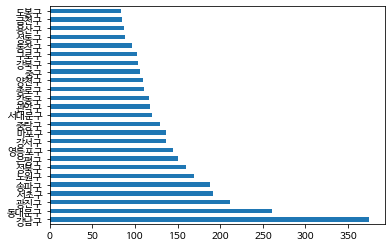

In [54]:
# 위에서 구한 결과를 막대그래프로 시각화하기

df.loc[(df['시도명']=='서울특별시') & (df['상권업종소분류명']=='약국'),'시군구명'].value_counts().plot(kind='barh')

* 서울특별시의 종합병원 데이터 조회하기

In [58]:
# '싱권업종소분류명'이 '종합병원'이고 '시도명'이 '서울특별시'인 데이터만 필터링
# 필터링 결과를 df_seoul_hospital에 대입

df_seoul_hospital = df.loc[(df['상권업종소분류명'] == '종합병원') & (df['시도명'] == '서울특별시')]

In [60]:
# 위의 결과를 '시군구명'으로 그룹화 해서 구별로 종합병원의 수를 세어본다.

df_seoul_hospital['시군구명'].value_counts()

강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: 시군구명, dtype: int64

* 서울의 각 구별 종합병원의 개수 구하기

In [62]:
# '상권업종소분류명'이 '종합병원'이고 '시도명'이 '서울특별시'인 데이터 필터링
# 필터링한 결과에서 '시군구명'컬럼을 선택하여 value_counts()하기

df.loc[(df['상권업종소분류명'] == '종합병원') & (df['시도명'] == '서울특별시'), '시군구명'].value_counts()

강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: 시군구명, dtype: int64

### 2.10.3 특정 지역만 보기

* 서울의 각 구별 의료기관 데이터 조회

In [63]:
# '시도명'이 '서울특별시'인 데이터를 필터링하여 '시군구명' 컬럼만 선택하고
# 그 결과를 value_counts()해 본다.

df.loc[(df['시도명'] == '서울특별시'), '시군구명'].value_counts()

강남구     3120
서초구     1491
동대문구    1152
송파구     1021
광진구      935
강서구      799
노원구      741
은평구      739
영등포구     731
성북구      708
강동구      703
마포구      649
관악구      578
중구       576
양천구      574
서대문구     543
중랑구      497
종로구      492
동작구      489
성동구      482
구로구      451
도봉구      412
강북구      396
용산구      361
금천구      303
Name: 시군구명, dtype: int64

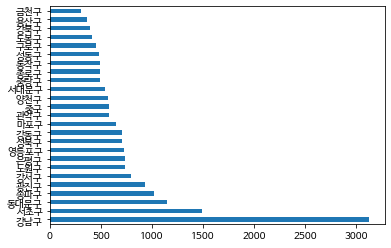

In [65]:
# 위결과를 barh로 시각화해본다.

df.loc[(df['시도명'] == '서울특별시'), '시군구명'].value_counts().plot.barh()

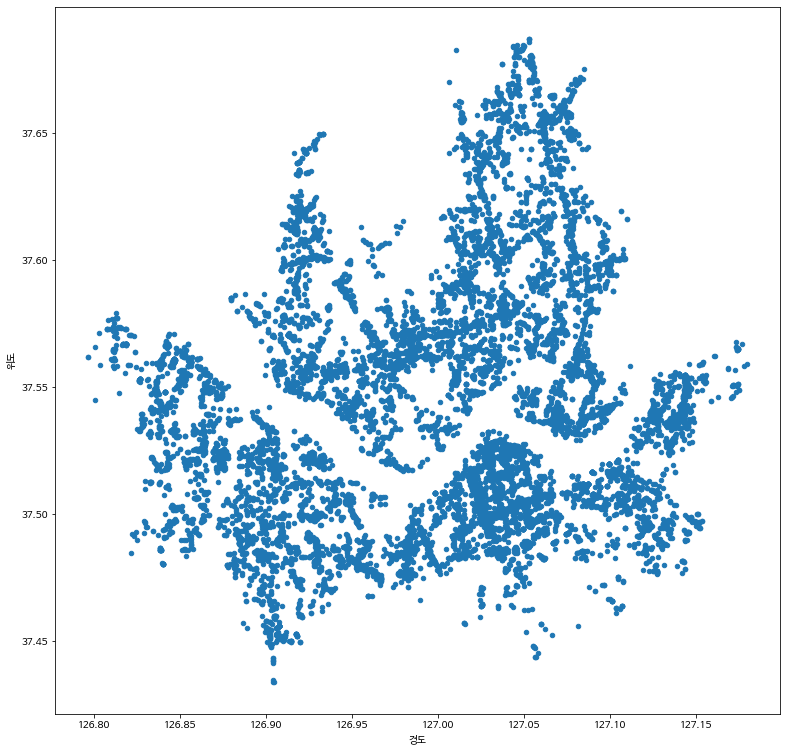

In [66]:
# 서울특별시의 데이터를 scatter plot을 이용해(경도와 위도정보 사용)를 시각화한다.

df.loc[(df['시도명'] == '서울특별시')].plot.scatter(x='경도', y='위도', figsize=(13, 13))